**Question 2**


Value Iteration

Optimal Policy using Value Iteration:
[[1 1 1 1 1 3 3 3 0]
 [1 1 1 1 1 3 0 0 0]
 [1 1 1 1 1 3 0 0 0]
 [1 1 1 1 1 0 0 2 3]
 [1 2 2 2 1 1 1 1 1]
 [1 0 3 3 1 1 1 1 1]
 [3 3 0 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1]
 [0 0 0 2 2 2 2 2 2]]


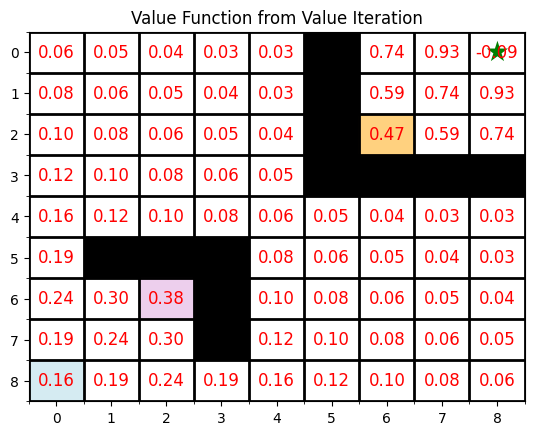

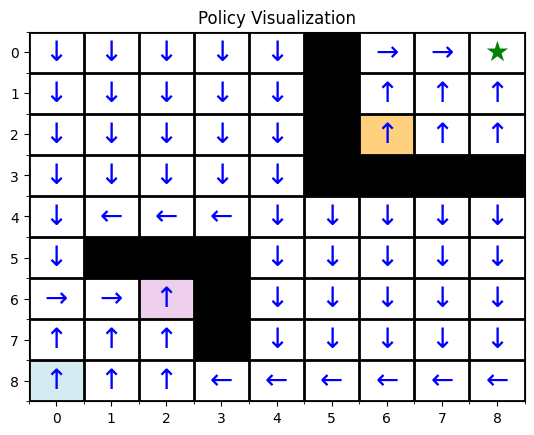


Policy Iteration

Optimal Policy using Policy Iteration:
[[1 1 1 1 1 3 3 3 0]
 [1 1 1 1 1 3 0 0 0]
 [1 1 1 1 1 3 0 0 0]
 [1 1 1 1 1 0 0 2 3]
 [1 2 2 2 1 1 1 1 1]
 [1 0 3 3 1 1 1 1 1]
 [3 3 0 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1]
 [0 0 0 2 2 2 2 2 2]]


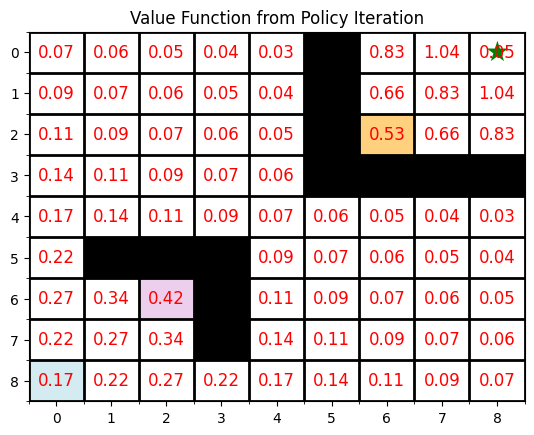

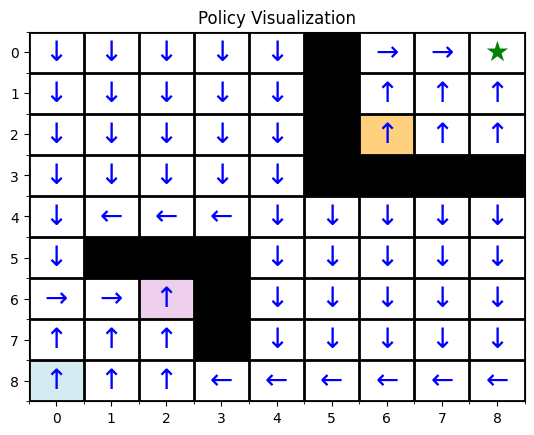

In [10]:
#Question 2

import numpy as np
import matplotlib.pyplot as plt

# parameters for the problem
grid_size = 9
start_position = (8, 0)
goal_position = (0, 8)
in_position = (6, 2)
out_position = (2, 6)
obstructions = [(5, 1), (5, 2), (5, 3), (6, 3), (7, 3), (0, 5), (1, 5), (2, 5), (3, 5), (3, 6), (3, 7), (3, 8)]
gamma = 0.8  # discount factor
theta = 1e-6  # threshold for convergence

# Actions
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # legal actions
action_symbols = ['↑', '↓', '←', '→']  # symbols for action

# Initialize grid and policy with random values
V = np.random.uniform(-0.1, 0.1, (grid_size, grid_size))
policy = np.random.choice(len(actions), size=(grid_size, grid_size))

# Rewards
reward_default = 0  # Reward for all non-goal states is 0
rewards = np.full((grid_size, grid_size), reward_default)
rewards[goal_position] = 1  # Goal has a reward of +1

def is_valid_position(x, y):
    return 0 <= x < grid_size and 0 <= y < grid_size and (x, y) not in obstructions

def step(x, y, action):
    if (x, y) == goal_position:
        return (x, y), rewards[x, y]
    if (x, y) == in_position:
        return out_position, rewards[x, y]

    dx, dy = actions[action]
    new_x, new_y = x + dx, y + dy

    if is_valid_position(new_x, new_y):
        return (new_x, new_y), rewards[new_x, new_y]
    return (x, y), rewards[x, y]  # stay at same place when no legal moves available

#Value Iteration
def value_iteration():
    global V
    while True:
        delta = 0
        for x in range(grid_size):
            for y in range(grid_size):
                if (x, y) == goal_position or (x, y) in obstructions:
                    continue
                v = V[x, y]
                action_values = []
                for action in range(len(actions)):
                    (new_x, new_y), reward = step(x, y, action)
                    action_values.append(reward + gamma * V[new_x, new_y])
                V[x, y] = max(action_values)
                delta = max(delta, abs(v - V[x, y]))
        if delta < theta:
            break

    # get policy from value function
    for x in range(grid_size):
        for y in range(grid_size):
            if (x, y) == goal_position or (x, y) in obstructions:
                continue
            action_values = []
            for action in range(len(actions)):
                (new_x, new_y), reward = step(x, y, action)
                action_values.append(reward + gamma * V[new_x, new_y])
            policy[x, y] = np.argmax(action_values)

#Policy Iteration
def policy_iteration():
    global V
    policy_stable = False
    while not policy_stable:
        # Policy Evaluation
        while True:
            delta = 0
            for x in range(grid_size):
                for y in range(grid_size):
                    if (x, y) == goal_position or (x, y) in obstructions:
                        continue
                    v = V[x, y]
                    action = policy[x, y]
                    (new_x, new_y), reward = step(x, y, action)
                    V[x, y] = reward + gamma * V[new_x, new_y]
                    delta = max(delta, abs(v - V[x, y]))
            if delta < theta:
                break

        # Policy Improve
        policy_stable = True
        for x in range(grid_size):
            for y in range(grid_size):
                if (x, y) == goal_position or (x, y) in obstructions:
                    continue
                old_action = policy[x, y]
                action_values = []
                for action in range(len(actions)):
                    (new_x, new_y), reward = step(x, y, action)
                    action_values.append(reward + gamma * V[new_x, new_y])
                policy[x, y] = np.argmax(action_values)
                if old_action != policy[x, y]:
                    policy_stable = False


# Plotting policy
def plot_policy():
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(grid_size))
    ax.set_yticks(np.arange(grid_size))
    ax.set_xticks(np.arange(-0.5, grid_size), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    # Mark obstructions
    for (obs_x, obs_y) in obstructions:
        ax.add_patch(plt.Rectangle((obs_y - 0.5, obs_x - 0.5), 1, 1, color='black'))

    # Mark special positions with light colors
    ax.add_patch(plt.Rectangle((start_position[1] - 0.5, start_position[0] - 0.5), 1, 1, color='lightblue', alpha=0.5))
    ax.add_patch(plt.Rectangle((in_position[1] - 0.5, in_position[0] - 0.5), 1, 1, color='plum', alpha=0.5))
    ax.add_patch(plt.Rectangle((out_position[1] - 0.5, out_position[0] - 0.5), 1, 1, color='orange', alpha=0.5))

    # Mark goal with a star
    ax.text(goal_position[1], goal_position[0], '★', ha='center', va='center', fontsize=20, color='green')

    # Plot policy arrows
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == goal_position or (i, j) in obstructions:
                continue
            action = policy[i, j]
            ax.text(j, i, action_symbols[action], ha='center', va='center', fontsize=20, color='blue')

    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(grid_size - 0.5, -0.5)
    plt.title("Policy Visualization")
    plt.show()


# value function plot
def plot_value_function(title):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(grid_size))
    ax.set_yticks(np.arange(grid_size))
    ax.set_xticks(np.arange(-0.5, grid_size), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    # Mark obstructions
    for (obs_x, obs_y) in obstructions:
        ax.add_patch(plt.Rectangle((obs_y - 0.5, obs_x - 0.5), 1, 1, color='black'))

    # Mark special positions with light colors
    ax.add_patch(plt.Rectangle((start_position[1] - 0.5, start_position[0] - 0.5), 1, 1, color='lightblue', alpha=0.5))
    ax.add_patch(plt.Rectangle((in_position[1] - 0.5, in_position[0] - 0.5), 1, 1, color='plum', alpha=0.5))
    ax.add_patch(plt.Rectangle((out_position[1] - 0.5, out_position[0] - 0.5), 1, 1, color='orange', alpha=0.5))

    # Mark goal with a star
    ax.text(goal_position[1], goal_position[0], '★', ha='center', va='center', fontsize=20, color='green')

    # Display values as text
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) in obstructions:
                continue
            ax.text(j, i, f'{V[i, j]:.2f}', ha='center', va='center', fontsize=12, color='red')

    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(grid_size - 0.5, -0.5)
    plt.title(title)
    plt.show()


# value Iteration
print("\nValue Iteration\n")
value_iteration()
print("Optimal Policy using Value Iteration:")
print(policy)

# Plot results
plot_value_function("Value Function from Value Iteration")
plot_policy()

# value function reset for policy Iteration
V = np.random.uniform(-0.1, 0.1, (grid_size, grid_size))



# policy Iteration
print("\nPolicy Iteration\n")
policy_iteration()
print("Optimal Policy using Policy Iteration:")
print(policy)

# Plot results
plot_value_function("Value Function from Policy Iteration")
plot_policy()
